[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Using YOLO for Early Intrusion Detection System**

---

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog/<BLOG_NAME>)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
[![Scientific Paper](https://img.shields.io/badge/Official-Paper-blue.svg)](<PAPER LINK>)

## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

In [ ]:
# uncomment the following lines to install required packages in a Jupyter notebook environment

# !pip install git+https://github.com/Labellerr/SDKPython.git
# !pip install ipyfilechooser
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
# all the imports required for this notebook
from labellerr.client import LabellerrClient
from labellerr.core.datasets import create_dataset_from_local
from labellerr.core.annotation_templates import create_template
from labellerr.core.projects import create_project
from labellerr.core.schemas import DatasetConfig, AnnotationQuestion, QuestionType, CreateTemplateParams, DatasetDataType, CreateProjectParams, RotationConfig
from labellerr.core.projects import LabellerrProject
from labellerr.core.exceptions import LabellerrError

import uuid
from ipyfilechooser import FileChooser

In [ ]:
api_key = input("YOUR_API_KEY")        # go to labellerr workspace to get your API key
api_secret = input("YOUR_API_SECRET")  # go to labellerr workspace to get your API secret
client_id = input("YOUR_CLIENT_ID")   # Contact labellerr support to get your client ID i.e. support@tensormatics.com

client = LabellerrClient(api_key, api_secret, client_id)


### ***STEP-1: Create a dataset on labellerr from your local folder***

The SDK supports in creating dataset by uploading local files. 

In [ ]:
# Create a folder chooser starting from a directory (for example, your home directory)
chooser = FileChooser('/')

# Set the chooser to folder selection mode only
chooser.title = 'Select a folder containing your dataset'
chooser.show_only_dirs = True

# Display the widget
display(chooser)

FileChooser(path='D:\', filename='', title='Select a folder containing your dataset', show_hidden=False, selec…

In [ ]:
path_to_dataset = chooser.selected_path
print("You selected:", path_to_dataset)

You selected: D:\Professional\Projects\Cell_Segmentation_using_YOLO\frames_output


In [ ]:
my_dataset_type = input("Enter your dataset type (video or image): ").lower()
print("Selected dataset type:", my_dataset_type)

Selected dataset type: video


In [ ]:
dataset = create_dataset_from_local(
    client=client,
    dataset_config=DatasetConfig(dataset_name="My Dataset", data_type="image"),
    folder_to_upload=path_to_dataset
)

print(f"Dataset created with ID: {dataset.dataset_id}")


### ***STEP-2: Create annotation project on labellerr of your created dataset***

Create a annotation project of your uploaded dataset to start performing annotation on labellerr UI

In [ ]:
# Create annotation guideline template for video annotation project (like classes to be annotated)

template = create_template(
    client=client,
    params=CreateTemplateParams(
        template_name="My Template",
        data_type=DatasetDataType.image,
        questions=[
            AnnotationQuestion(
                question_number=1,
                question="Object",
                question_id=str(uuid.uuid4()),
                question_type=QuestionType.polygon,
                required=True,
                color="#FF0000"
            )
        ]
    )
)
print(f"Annotation template created with ID: {template.annotation_template_id}")


In [ ]:
dataset.status()        # wait until dataset is processed before creating project

project = create_project(
    client=client,
    params=CreateProjectParams(
        project_name="My Project",
        data_type=DatasetDataType.image,
        rotations=RotationConfig(
            annotation_rotation_count=1,
            review_rotation_count=1,
            client_review_rotation_count=1
        )
    ),
    datasets=[dataset],
    annotation_template=template
)

print(f"✓ Project created: {project.project_id}")

Your project has been created now go to labellerr platform to perform annotation 

***click to go to labellerr.com***

[![Labellerr](https://cdn.labellerr.com/1%20%20Documentation/1c9dc7ce-9a54-4111-8fd5-0363ba3e00e1.webp)](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks)
Open the project you created (Projects → select your project).

Click Start Labeling to open the annotation interface. Use the configured labeling tools (bounding boxes, polygon, dot, classification, etc.) to annotate files.
### ***STEP-3: Export your annotation in required format***

Generate a temporary download URL to retrieve your exported JSON file:

### Export Configuration Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `export_name` | string | Display name for the export |
| `export_description` | string | Description of what this export contains |
| `export_format` | string | Output format (e.g., `json`, `xml`, `coco`) |
| `statuses` | list | Annotation statuses to include in export |

### Common Annotation Statuses

- **`review`**: Annotations pending review
- **`r_assigned`**: Review assigned to a reviewer
- **`client_review`**: Under client review
- **`cr_assigned`**: Client review assigned
- **`accepted`**: Annotations accepted and finalized

---

In [ ]:
export_config = {
    "export_name": "Weekly Export",
    "export_description": "Export of all accepted annotations",
    "export_format": "coco_json",
    "statuses": ['review', 'r_assigned','client_review', 'cr_assigned','accepted']
}

try:
    # Get project instance
    project = LabellerrProject(client=client, project_id=project.project_id)
    
    # Create export
    result = project.create_local_export(export_config)
    export_id = result["response"]['report_id']
    print(f"Local export created successfully. Export ID: {export_id}")
except LabellerrError as e:
    print(f"Local export creation failed: {str(e)}")
    
    
try:
    download_url = client.fetch_download_url(
        project_id=project.project_id,
        uuid=str(uuid.uuid4()),
        export_id=export_id
    )
    print(f"Download URL: {download_url}")
except LabellerrError as e:
    print(f"Failed to fetch download URL: {str(e)}")


Now you can download your annotations locally using given URL

## **Install Required Libraries**
Install necessary packages including Ultralytics YOLO, OpenCV, NumPy, and Shapely for geometric polygon operations used in intrusion detection.

In [ ]:
!pip install ultralytics opencv-python-headless numpy shapely

### **Import Core Libraries**
Import essential libraries: OpenCV for video processing, NumPy for array operations, YOLO for object detection, Matplotlib for visualization, and Shapely for polygon-based spatial calculations.

In [1]:
# Import libraries
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


### **Interactive Polygon Selection Tool**
Create an interactive fullscreen tool that allows users to click on video frames to define polygon vertices for the restricted intrusion detection zone. Supports adding, deleting, and clearing points.

In [2]:
def select_polygon(video_path):
    """
    Interactive tool to define polygon by clicking on video frame
    Returns: list of polygon points in image coordinates
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return []
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, 30)  # Start from frame 30 for better visibility
    
    # Read first frame
    success, frame = cap.read()
    if not success:
        print("Error reading video frame")
        return []
    
    # Setup window in full screen mode
    window_name = "Define Restricted Area - Press ESC when done"
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    # Create a copy of the frame for drawing (we'll keep original intact)
    display_frame = frame.copy()
    points = []
    
    # Function to update the display
    def update_display():
        nonlocal display_frame, frame, points
        display_frame = frame.copy()
        
        # Draw instructions
        instructions = [
            "INSTRUCTIONS:",
            "1. Click to add polygon vertices",
            "2. Press 'd' to delete last point",
            "3. Press 'c' to clear all points",
            "4. Press ENTER when finished",
            "5. Press ESC to quit"
        ]
        
        for i, text in enumerate(instructions):
            cv2.putText(display_frame, text, (10, 30 + i*30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        # Draw points and polygon
        if len(points) > 0:
            for i, (px, py) in enumerate(points):
                cv2.circle(display_frame, (px, py), 8, (0, 0, 255), -1)
                cv2.putText(display_frame, str(i+1), (px+15, py-15), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2)
            
            if len(points) > 1:
                cv2.polylines(display_frame, [np.array(points)], False, (0, 255, 0), 2)
        
        cv2.imshow(window_name, display_frame)
    
    # Mouse callback function
    def mouse_callback(event, x, y, flags, param):
        nonlocal points
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append((x, y))
            update_display()
    
    cv2.setMouseCallback(window_name, mouse_callback)
    
    # Initial display
    update_display()
    
    while True:
        key = cv2.waitKey(0)  # Wait for key press
        
        if key == 13 or key == 10:  # ENTER key (Finish)
            if len(points) >= 3:
                break
            else:
                print("Need at least 3 points for a polygon")
        elif key == ord('d'):  # Delete last point
            if points:
                points.pop()
                update_display()
        elif key == ord('c'):  # Clear all
            points = []
            update_display()
        elif key == 27:  # ESC key (Quit)
            points = []
            break
    
    cap.release()
    cv2.destroyAllWindows()
    return points

### **Setup Video and Define Restricted Area**
Define video input/output paths, set intrusion detection parameters (class ID and confidence threshold), and interactively select the polygon boundary for the restricted zone using the polygon selection tool.

In [10]:
# VIDEO SETUP
video_path = r"video\1.mp4"  # Replace with your video file
output_path = "output_video.mp4"

# TRESPASS SETTINGS
trespass_class_id = 0  # COCO class ID for 'person'
min_confidence = 0.5   # Minimum detection confidence

# INTERACTIVELY SELECT POLYGON
print("Starting polygon selection...")
polygon_points = select_polygon(video_path)

if not polygon_points:
    print("No polygon defined. Exiting.")
    exit()

print(f"Polygon defined with {len(polygon_points)} points:")
print(polygon_points)

# Create Shapely polygon
trespass_polygon = Polygon(polygon_points)


Starting polygon selection...
Polygon defined with 10 points:
[(1842, 668), (1032, 309), (496, 532), (714, 840), (441, 1005), (442, 1030), (404, 1060), (432, 1078), (1665, 1078), (1844, 669)]


### **Visualize Restricted Zone on Video Frame**
Extract a frame from the video and display the defined restricted polygon with point labels and connecting lines to verify the zone boundaries before processing.

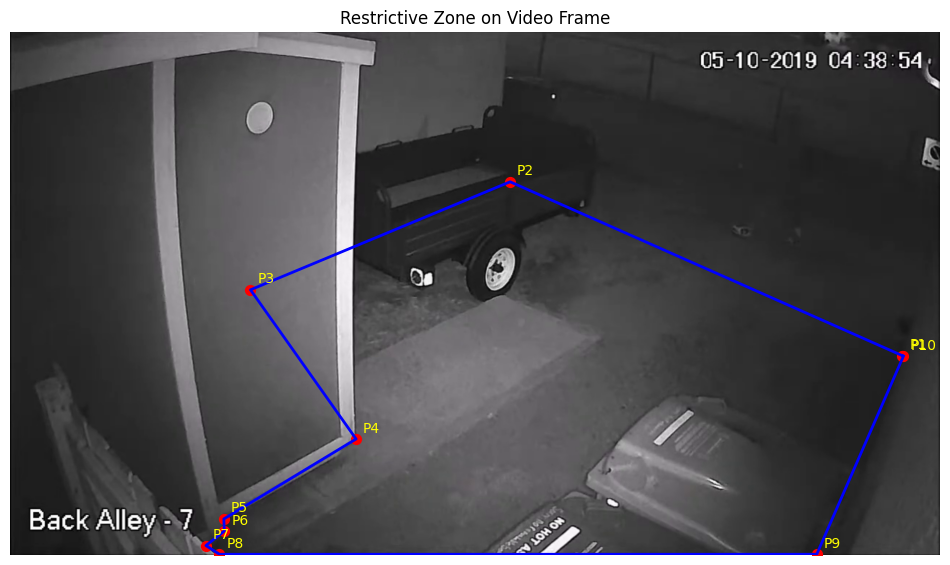

In [11]:
points = polygon_points

# Load a specific frame from your video
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 30)  # Set to desired frame
ret, frame = cap.read()
cap.release()

# Convert BGR to RGB for matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Plot the frame with points
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)

# Extract x and y coordinates
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Plot points
plt.scatter(x_coords, y_coords, c='red', s=50, marker='o')

# Connect points in index order
plt.plot(x_coords, y_coords, c='blue', linestyle='-', linewidth=2)

# Optional: Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'P{i+1}', (x, y), xytext=(5, 5), 
                textcoords='offset points', color='yellow')

plt.title('Restrictive Zone on Video Frame')
plt.axis('off')  # Hide axes for cleaner look
plt.show()

### **Display Polygon and Check Containment**
Display the Shapely polygon object representing the restricted zone to verify it's properly configured for intrusion detection calculations.

### **FUNCTION TO DETECT IF OBJECT IS INSIDE THE RESTRICTIVE ZONE**

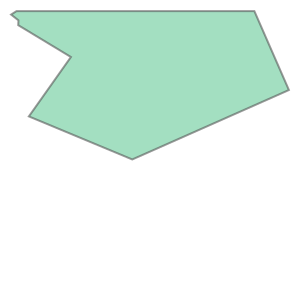

In [12]:
trespass_polygon = Polygon(polygon_points)

trespass_polygon


### **Load YOLOv8 Model**
Initialize and load the pre-trained YOLOv8 medium model (yolov8m.pt) for real-time person detection in video frames.

In [7]:
# Initialize YOLOv8 model
# Using 'yolov8m.pt' for speed and accuracy
model = YOLO('yolov8m.pt')


### **Process Video and Detect Intrusions**
Process each video frame with YOLO detection, check if detected persons' feet positions fall within the restricted polygon, and mark them as trespassers (red) or authorized (green). Save annotated output video with warnings.

In [8]:
# [Video Processing]
def process_video():
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Video writer setup
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    frame_num = 0
    trespass_detected = False
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
            
        frame_num += 1
        print(f"Processing frame {frame_num}/{frame_count}", end='\r')
        
        # Draw polygon on frame
        cv2.polylines(frame, [np.array(polygon_points)], True, (0, 0, 255), 2)
        cv2.putText(frame, "Restricted Area", 
                   (polygon_points[0][0], polygon_points[0][1]-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        # Run YOLO inference
        results = model(frame, verbose=False, classes=[trespass_class_id])[0]
        
        current_trespass = False
        
        for box in results.boxes:
            conf = float(box.conf)
            if conf < min_confidence:
                continue
                
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            # Calculate bottom-center point (feet position)
            feet_x = (x1 + x2) // 2
            feet_y = y2
            
            # Check if point is inside polygon
            point = Point(feet_x, feet_y)
            if trespass_polygon.contains(point):
                current_trespass = True
                trespass_detected = True
                
                # Draw trespasser bounding box (red)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                cv2.putText(frame, f'Trespasser: {conf:.2f}', (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                
                # Draw feet position marker
                cv2.circle(frame, (feet_x, feet_y), 8, (0, 0, 255), -1)
            
            else:
                
                # Draw bounding box for non-trespassers (green)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f'Person: {conf:.2f}', (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                
                # Draw feet position marker
                cv2.circle(frame, (feet_x, feet_y), 8, (0, 255, 0), -1) 
        
        # Display global warning if trespassing detected
        if current_trespass:
            cv2.putText(frame, "TRESPASSING DETECTED!", (width//6, 50),
                       cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
        
        # Write frame to output video
        out.write(frame)
    
    cap.release()
    out.release()
    
    if trespass_detected:
        print("\nTrespassing detected in video!")
    else:
        print("\nNo trespassing detected")
    print(f"Output saved to: {output_path}")


### **Execute Intrusion Detection**
Run the complete intrusion detection pipeline on the video. Generates output with color-coded detections and saves the annotated video with warnings when trespassing is detected.

In [13]:
# [Run the Detection]
process_video()

Processing frame 440/440
Trespassing detected in video!
Output saved to: output_video.mp4


---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
